In [17]:
### -- ASSIGNMENG 3

# -- INITIALIZE COG AND SIMIL_MATRIX

import math
import numpy as np  
import pandas as pd
ordersfile = pd.read_csv('orders.csv',header=None)
orders = [[int(value) for value in row.dropna()] for w, row in ordersfile.iterrows()]
print(orders)

df = pd.read_csv('wh_coords.csv')
X = df['x'].tolist()
Y = df['y'].tolist()
print(X)
print(Y)


max_cap = 20

[[76, 270, 224, 159, 241, 329], [19], [252, 75], [89], [6], [182, 179, 276, 208], [289, 3, 322, 284, 252], [146, 204, 61, 223, 96, 269], [22, 88, 265, 315], [264, 334, 179, 212, 261], [291, 287], [28, 233, 297, 83, 128, 145], [56], [237, 275, 80, 21], [111]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 41.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 59.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 61.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 69.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 11.0

In [18]:
def COG(order):
    x = 0
    y = 0
    for line in order:
        x += X[line-1]
        y += Y[line-1]
    return x/len(order),y/len(order)

def euclid_dist(x1,y1,x2,y2):
    return math.sqrt((x2-x1)**2 + (y2-y1)**2)

In [ ]:
# -- SEED RULE
# FIRST ORDER IS REPRESENTED AS "RNDM"

In [19]:
# -- random seed
np.random.seed(0)
rndm = np.random.randint(0,len(orders))
batches = [[orders[rndm]]]
count = len(orders[rndm])
print(rndm)

12


In [22]:
#  LARGEST ORDER
num_list_max = max([len(orders[i]) for i in range(len(orders))])
target_orders_index = []
for i in range(len(orders)):
    if len(orders[i]) == num_list_max:
        target_orders_index.append(i)
print(target_orders_index)
if len(target_orders_index)==1:
    rndm = target_orders_index[0]
else:
    rndm = target_orders_index[0]
    x,y = COG(orders[rndm])
    dis = euclid_dist(x,y,0,0)
    for index in target_orders_index[1:]:
        x,y = COG(orders[index])
        dis1 = euclid_dist(x,y,0,0)
        if dis > dis1:
            rndm = index
            dis = dis1
        else:
            None       
batches = [[orders[rndm]]]
count = len(orders[rndm])
print(rndm)

[0, 7, 11]
11


In [27]:
#  Order with furthest COG from depot (located in (0, 0))
dis_from_depot = []
for order in orders:
    x,y = COG(order)
    dis_from_depot.append(math.sqrt(x**2+y**2))
rndm = dis_from_depot.index(max(dis_from_depot))
batches = [[orders[rndm]]]
count = len(orders[rndm])
print(rndm)


14


In [28]:
# -- accompany rule of eu distance
simil_matr = np.zeros([len(orders),len(orders)])

for i in range(len(orders)):
    xi,yi = COG(orders[i])
    for j in range(len(orders)):
        if i != j:
            xj,yj = COG(orders[j])
            simil_matr[i,j] = euclid_dist(xi,yi,xj,yj)
def most_similar(i,idex):
    min_sim = np.inf
    j_sim = -1
    for j in range(len(orders)):
        simil = simil_matr[i,j]
        if simil < min_sim and i != j and j in idex:
            min_sim = simil
            j_sim = j
    return j_sim
i = rndm
to_add = list(range(len(orders)))
to_add.remove(i)


k = 0
while to_add != []:
    j = most_similar(i,to_add)
    if count + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        count += len(orders[j])
        i = j
    else:
        k+=1
        batches.append([orders[j]])
        count = len(orders[j])
        to_add.remove(j)
        i = j
for n, batch in enumerate(batches):
    print('the batch%d'%n,batch)
print(batches)

the batch0 [[111], [89], [146, 204, 61, 223, 96, 269], [76, 270, 224, 159, 241, 329], [22, 88, 265, 315], [291, 287]]
the batch1 [[182, 179, 276, 208], [264, 334, 179, 212, 261], [56], [237, 275, 80, 21], [28, 233, 297, 83, 128, 145]]
the batch2 [[289, 3, 322, 284, 252], [252, 75], [19], [6]]
[[[111], [89], [146, 204, 61, 223, 96, 269], [76, 270, 224, 159, 241, 329], [22, 88, 265, 315], [291, 287]], [[182, 179, 276, 208], [264, 334, 179, 212, 261], [56], [237, 275, 80, 21], [28, 233, 297, 83, 128, 145]], [[289, 3, 322, 284, 252], [252, 75], [19], [6]]]


In [83]:
# Another Accompany Rule

def sumof(seed,todo):
    out = 0
    for i in todo:
        x1,y1 = X[i-1],Y[i-1]
        dis = []
        for j in seed:
            x2,y2 = X[j-1],Y[j-1]
            dis.append(euclid_dist(x1,y1,x2,y2))
        out += min(dis)
    return out


def who_add(i,idx):
    dis = []
    for j in idx:
        dis.append(sumof(orders[i],orders[j]))
    min_idx = dis.index(min(dis))
    return idx[min_idx]
i = rndm
to_add = list(range(len(orders)))
to_add.remove(i)


k = 0
while to_add != []:
    j = who_add(i,to_add)
    if count + len(orders[j]) <= max_cap:
        batches[k].append(orders[j])
        to_add.remove(j)
        count += len(orders[j])
        i = j
    else:
        k+=1
        batches.append([orders[j]])
        count = len(orders[j])
        to_add.remove(j)
        i = j
for n, batch in enumerate(batches):
    print('the batch%d'%n,batch)
print(batches)


    



the batch0 [[111], [89], [252, 75], [6], [19], [56], [291, 287], [182, 179, 276, 208], [264, 334, 179, 212, 261]]
the batch1 [[237, 275, 80, 21], [289, 3, 322, 284, 252], [28, 233, 297, 83, 128, 145], [22, 88, 265, 315]]
the batch2 [[146, 204, 61, 223, 96, 269], [76, 270, 224, 159, 241, 329]]
[[[111], [89], [252, 75], [6], [19], [56], [291, 287], [182, 179, 276, 208], [264, 334, 179, 212, 261]], [[237, 275, 80, 21], [289, 3, 322, 284, 252], [28, 233, 297, 83, 128, 145], [22, 88, 265, 315]], [[146, 204, 61, 223, 96, 269], [76, 270, 224, 159, 241, 329]]]


In [29]:
#  Evaluate perfoemance
performance = []
for batch in batches:
    flattened_list = [item for sublist in batch for item in sublist]
    flattened_list = sorted(flattened_list)
    print(flattened_list)
    onedis = 0
    for i in range(len(flattened_list)-1):
        x1,y1 = X[flattened_list[i]-1],Y[flattened_list[i]-1]
        x2,y2 = X[flattened_list[i+1]-1],Y[flattened_list[i+1]-1]
        onedis += euclid_dist(x1,y1,x2,y2)
    onedis += euclid_dist(X[flattened_list[0]-1],Y[flattened_list[0]-1],0,0)
    onedis += euclid_dist(X[flattened_list[-1]-1],Y[flattened_list[-1]-1],0,0)
    performance.append(onedis)
for i in range(len(performance)):
    print("batch %d:"%(i+1),performance[i])
print("The total distance:",sum(performance))



[22, 61, 76, 88, 89, 96, 111, 146, 159, 204, 223, 224, 241, 265, 269, 270, 287, 291, 315, 329]
[21, 28, 56, 80, 83, 128, 145, 179, 179, 182, 208, 212, 233, 237, 261, 264, 275, 276, 297, 334]
[3, 6, 19, 75, 252, 252, 284, 289, 322]
batch 1: 551.5260423290819
batch 2: 533.6297789341579
batch 3: 235.23084761676432
The total distance: 1320.3866688800042


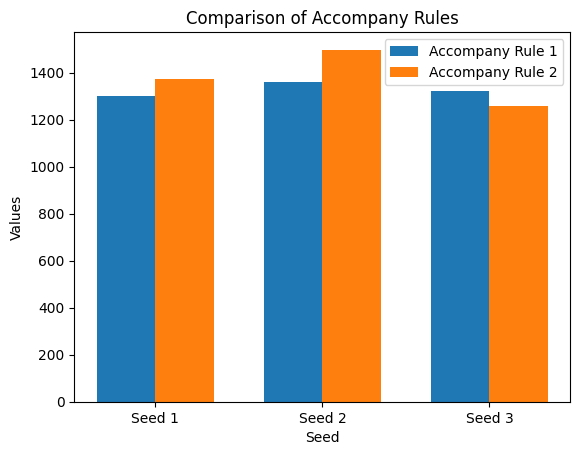

In [32]:
import matplotlib.pyplot as plt

# Your data
data_rule1 = [1300.0243, 1358.1527, 1320.386666]
data_rule2 = [1373.3740747128638, 1497.2593359987288, 1256.2662456781773]

# Corresponding labels
labels_rule1 = ['Seed 1', 'Seed 2', 'Seed 3']
labels_rule2 = ['Seed 1', 'Seed 2', 'Seed 3']

# Plotting
fig, ax = plt.subplots()

# Bar width can be adjusted as needed
bar_width = 0.35

# Bar positions
bar_positions_rule1 = range(len(data_rule1))
bar_positions_rule2 = [pos + bar_width for pos in bar_positions_rule1]

# Create bars
ax.bar(bar_positions_rule1, data_rule1, width=bar_width, label='Accompany Rule 1')
ax.bar(bar_positions_rule2, data_rule2, width=bar_width, label='Accompany Rule 2')

# Set labels and title
ax.set_xticks([pos + bar_width/2 for pos in bar_positions_rule1])
ax.set_xticklabels(labels_rule1)
ax.set_xlabel('Seed')
ax.set_ylabel('Values')
ax.set_title('Comparison of Accompany Rules')

# Show legend
ax.legend()

# Show the plot
plt.show()
